<a href="https://colab.research.google.com/github/sandovarghese/DSML_Oct_2024/blob/main/Project_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")



# **Importing DATA**

In [2]:
train_df = pd.read_csv("/content/TRAIN.csv")
test_df = pd.read_csv("/content/TEST_FINAL.csv")

## **Overview**

In [3]:
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
test_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [7]:
train_df['Date'] = train_df['Date'].apply(pd.to_datetime)
test_df['Date'] = test_df['Date'].apply(pd.to_datetime)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


# **Checking Missing Value**

In [9]:
train_df.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [10]:
test_df.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0


In [11]:
print("Duplicate Datapoints:",(train_df.duplicated().sum()))

Duplicate Datapoints: 0


In [12]:
train_df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,188340,188340,T1000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,188340.0,NaN,NaN,NaN,183.0,1.0,92.0,183.0,274.0,365.0,105.366308
Store_Type,188340,4,S1,88752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,188340,5,L1,85140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,188340,4,R1,63984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,188340,NaN,NaN,NaN,2018-09-15 12:00:00.000000256,2018-01-01 00:00:00,2018-05-09 18:00:00,2018-09-15 12:00:00,2019-01-22 06:00:00,2019-05-31 00:00:00,NaN
Holiday,188340.0,NaN,NaN,NaN,0.131783,0.0,0.0,0.0,0.0,1.0,0.338256
Discount,188340,2,No,104051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#Order,188340.0,NaN,NaN,NaN,68.205692,0.0,48.0,63.0,82.0,371.0,30.467415
Sales,188340.0,NaN,NaN,NaN,42784.327982,0.0,30426.0,39678.0,51909.0,247215.0,18456.708302


In [13]:
train_df['Store_Type'].value_counts()

,count
Store_Type,
S1,88752
S4,45924
S2,28896
S3,24768


In [14]:
train_df['Location_Type'].value_counts()

,count
Location_Type,
L1,85140
L2,48504
L3,29928
L5,13932
L4,10836


In [15]:
train_df['Discount'].value_counts()

,count
Discount,
No,104051
Yes,84289


In [16]:
train_df['Region_Code'].value_counts()

,count
Region_Code,
R1,63984
R2,54180
R3,44376
R4,25800


In [17]:
#Insights
# There are 188340 number of order data
# There are 4 Store types, 5 Locations, 4 regions in the Data
# The data starts from 01-01-2018 to 31-5-2019
# Most orders are from S1,L1,R1
# Highest sales value is 247215
# No duplicate values
# No missing values in Data

In [18]:
df_train = train_df.copy()
df_test = test_df.copy()


In [19]:
df_month = df_train
df_month['month'] = df_month['Date'].dt.to_period('M')
df_month.head()




,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018-01
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018-01
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018-01
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018-01
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018-01


# **EDA**

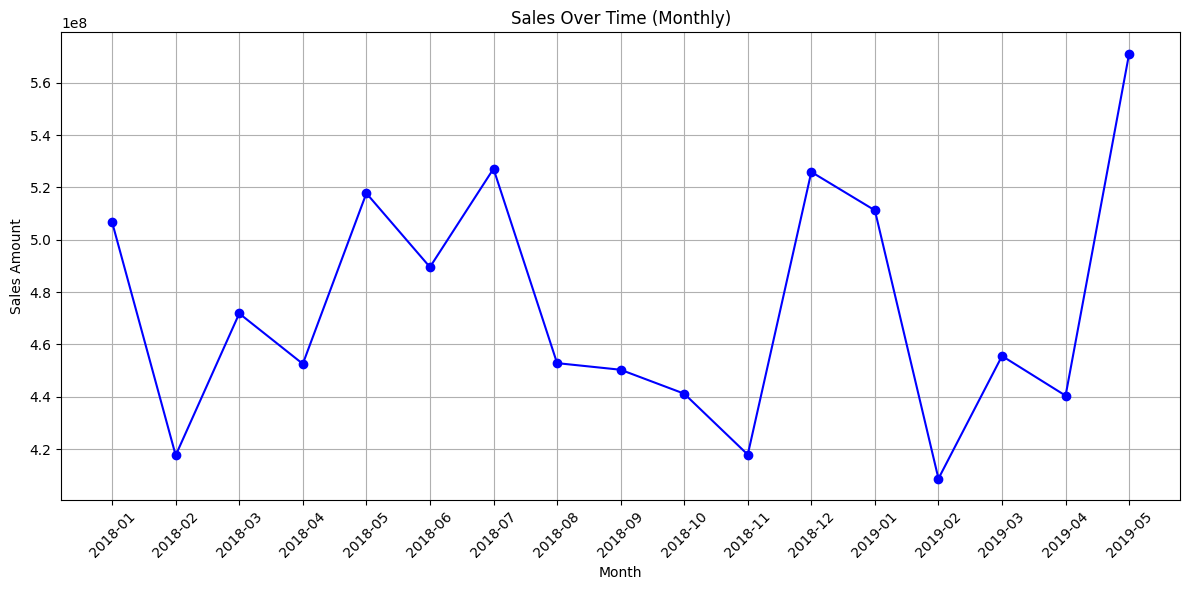

In [25]:
monthly_sales = df_month.groupby('month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['Sales'], marker='o', color='b', linestyle='-')
plt.title('Sales Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)  # Rotate month labels for readability
plt.grid(True)  # Optional, adds a grid
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


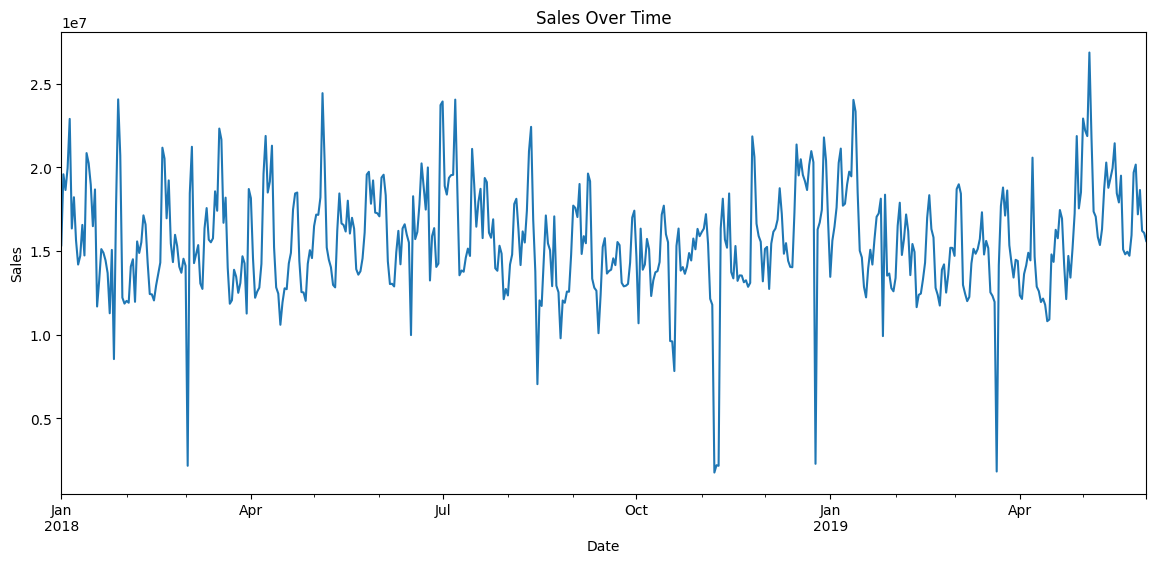

In [26]:
ts_data = train_df.copy()
ts_data['Date'] = pd.to_datetime(ts_data['Date'])
ts_data.set_index('Date', inplace=True)

# Plotting sales over time
plt.figure(figsize=(14, 6))
ts_data.groupby('Date')['Sales'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

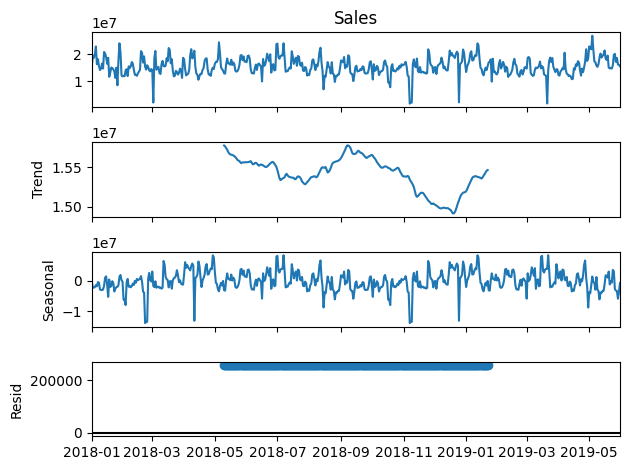

In [27]:
ts_sales = ts_data['Sales'].resample('D').sum()
period = int(len(ts_sales) / 2) if len(ts_sales) < 730 else 365
decomposition = sm.tsa.seasonal_decompose(ts_sales, model='additive', period=period)

decomposition.plot()
plt.show()

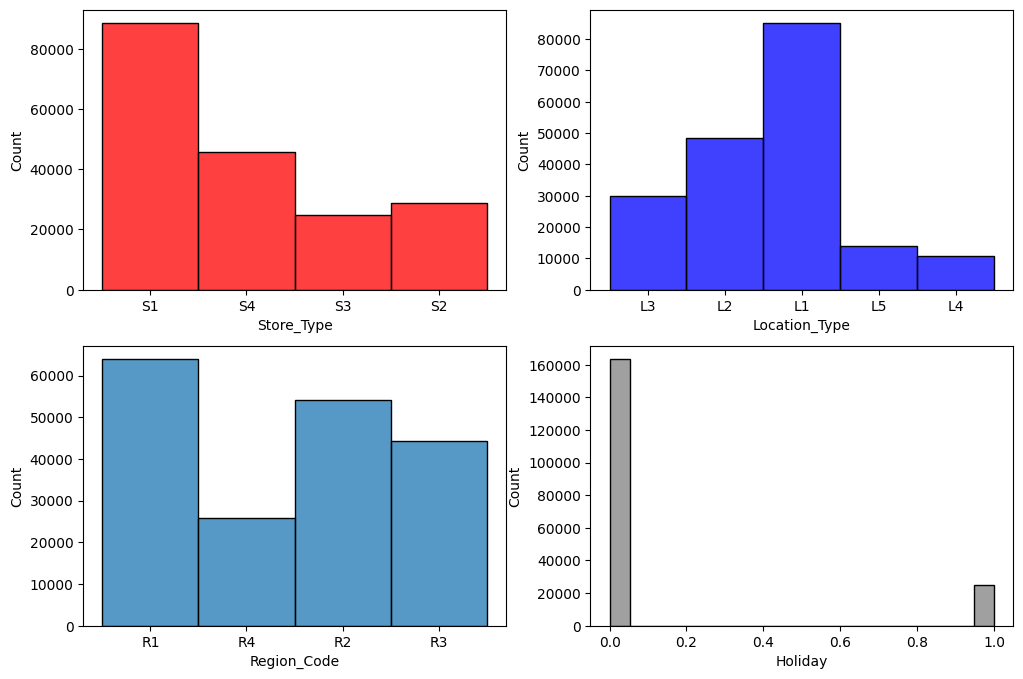

In [28]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=df_train, x='Store_Type', ax=axis[0,0],color = "red")
sns.histplot(data=df_train, x='Location_Type', ax=axis[0,1],color = "blue")
sns.histplot(data=df_train, x='Region_Code', ax=axis[1,0])
sns.histplot(data=df_train, x='Holiday',ax=axis[1,1],color = "grey")
plt.show()


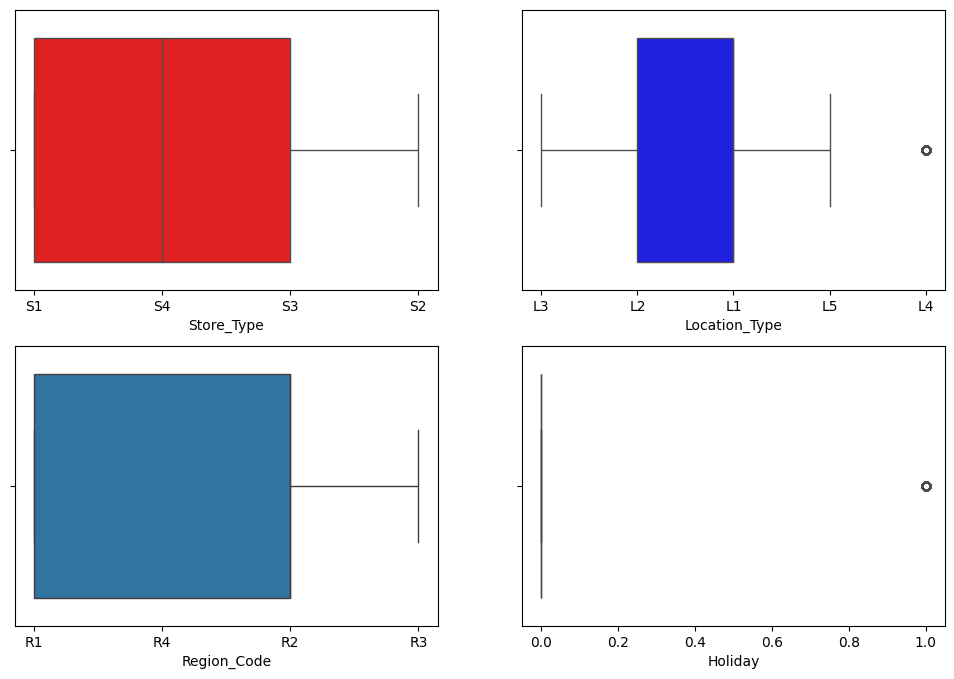

In [29]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.boxplot(data=df_train, x='Store_Type', ax=axis[0,0],orient='h',color = "red")
sns.boxplot(data=df_train, x='Location_Type', ax=axis[0,1],orient='h',color = "blue")
sns.boxplot(data=df_train, x='Region_Code', orient='h', ax=axis[1,0])
sns.boxplot(data=df_train, x='Holiday',ax=axis[1,1], orient='h', color = "grey")
plt.show()


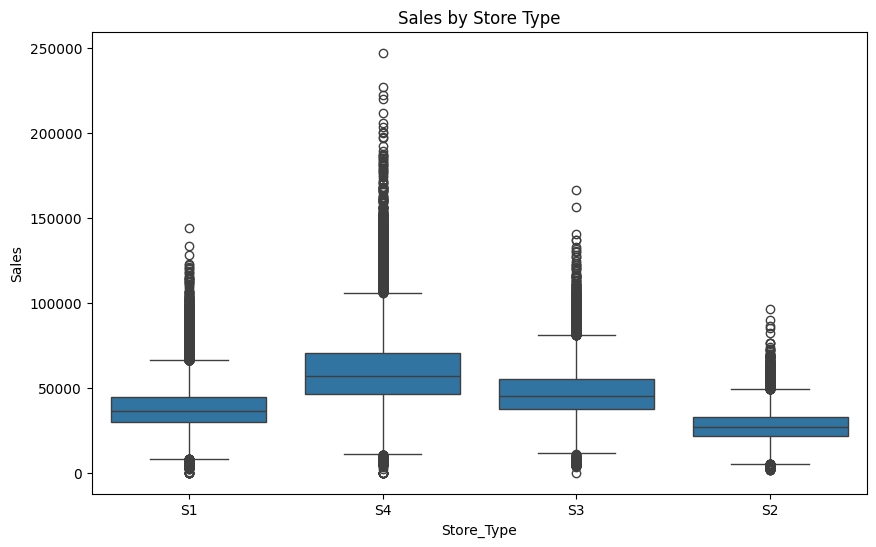

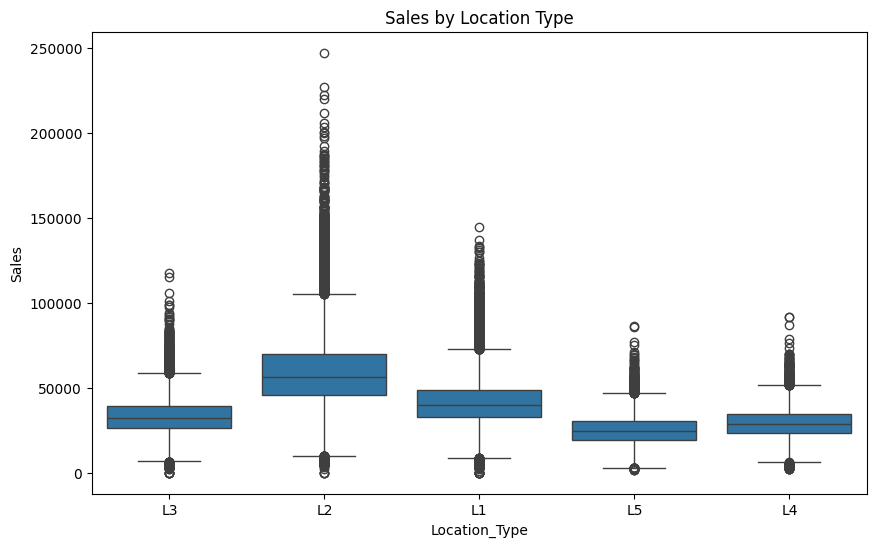

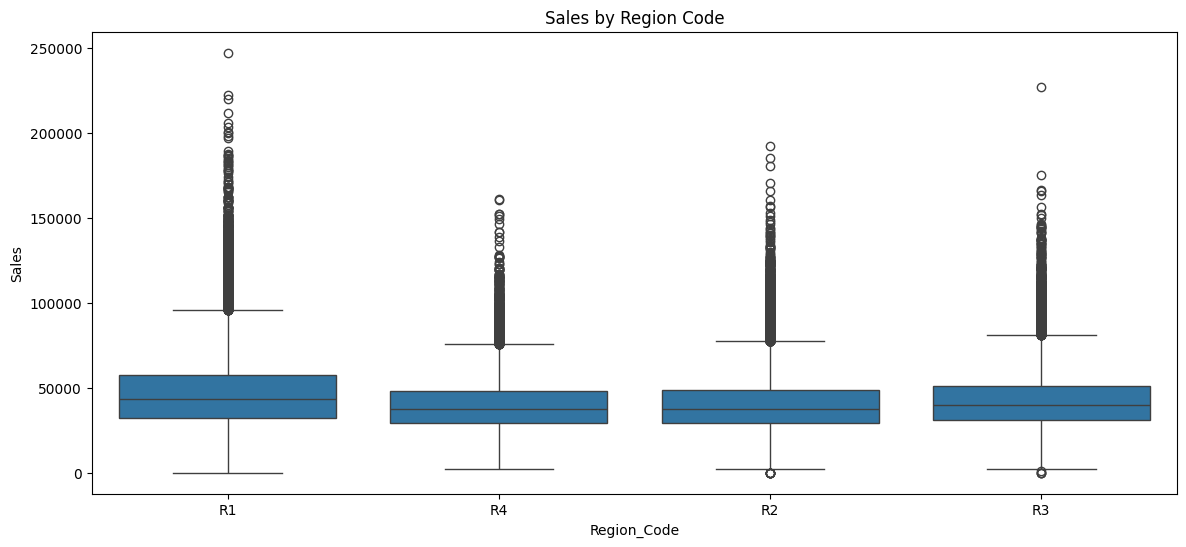

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store_Type', y='Sales', data=ts_data)
plt.title('Sales by Store Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Location_Type', y='Sales', data=ts_data)
plt.title('Sales by Location Type')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Region_Code', y='Sales', data=ts_data)
plt.title('Sales by Region Code')
plt.show()

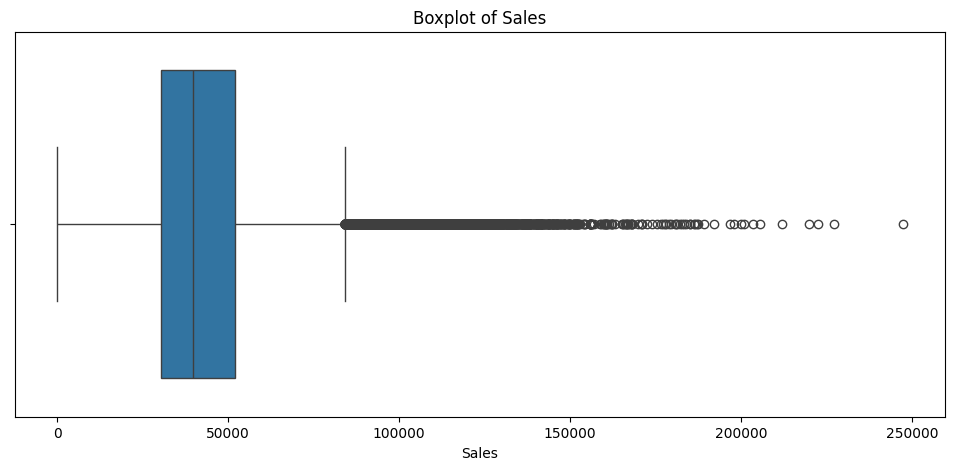

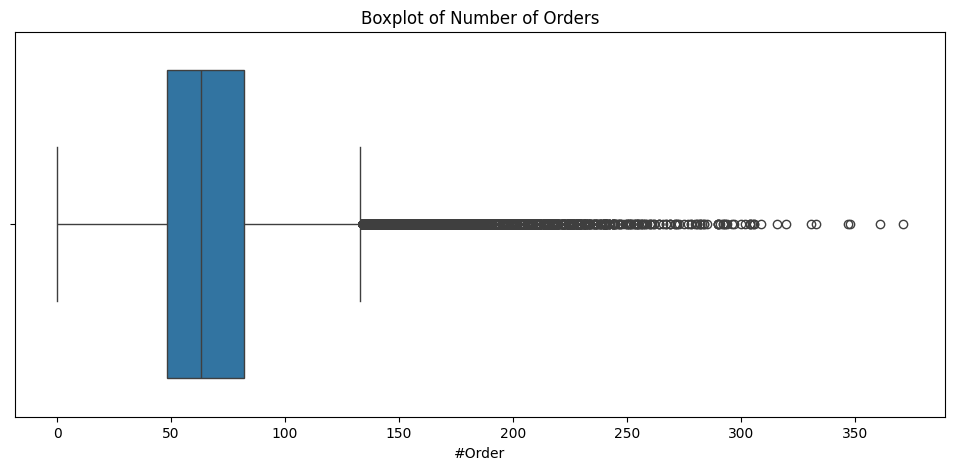

Number of outliers in Sales: 2421


In [32]:
out_data = ts_data.copy()
plt.figure(figsize=(12, 5))
sns.boxplot(x=out_data['Sales'])
plt.title('Boxplot of Sales')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=out_data['#Order'])
plt.title('Boxplot of Number of Orders')
plt.show()

out_data['Sales_Z'] = np.abs(stats.zscore(out_data['Sales']))
outliers_sales = out_data[out_data['Sales_Z'] > 3]  # Z-score threshold for outliers
print("Number of outliers in Sales:", len(outliers_sales))

# **Converting Date to Day, Month, & Year columns & Encoding**

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Store_Type'] = le.fit_transform(df_train['Store_Type'])
df_train['Location_Type'] = le.fit_transform(df_train['Location_Type'])
df_train['Region_Code'] = le.fit_transform(df_train['Region_Code'])
df_train['Holiday'] = le.fit_transform(df_train['Holiday'])
df_train['Discount'] = le.fit_transform(df_train['Discount'])
df_train['ID'] = le.fit_transform(df_train['ID'])
df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month
df_train['day'] = df_train['Date'].dt.day
df_train.drop(['Date'],axis=1,inplace=True)





In [34]:
df_train.head(20)


,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,month,year,day
0,0,1,0,2,0,1,1,9,7011.84,1,2018,1
1,1,253,3,1,0,1,1,60,51789.12,1,2018,1
2,2,252,2,1,0,1,1,42,36868.20,1,2018,1
3,3,251,1,2,0,1,1,23,19715.16,1,2018,1
4,4,250,1,2,3,1,1,62,45614.52,1,2018,1
5,5,249,0,2,1,1,1,39,34211.22,1,2018,1
6,6,248,0,0,1,1,1,40,35352.66,1,2018,1
7,7,247,0,0,2,1,1,64,52650.00,1,2018,1
8,8,246,2,0,2,1,1,62,42633.78,1,2018,1
9,9,254,3,0,0,1,1,87,62572.80,1,2018,1


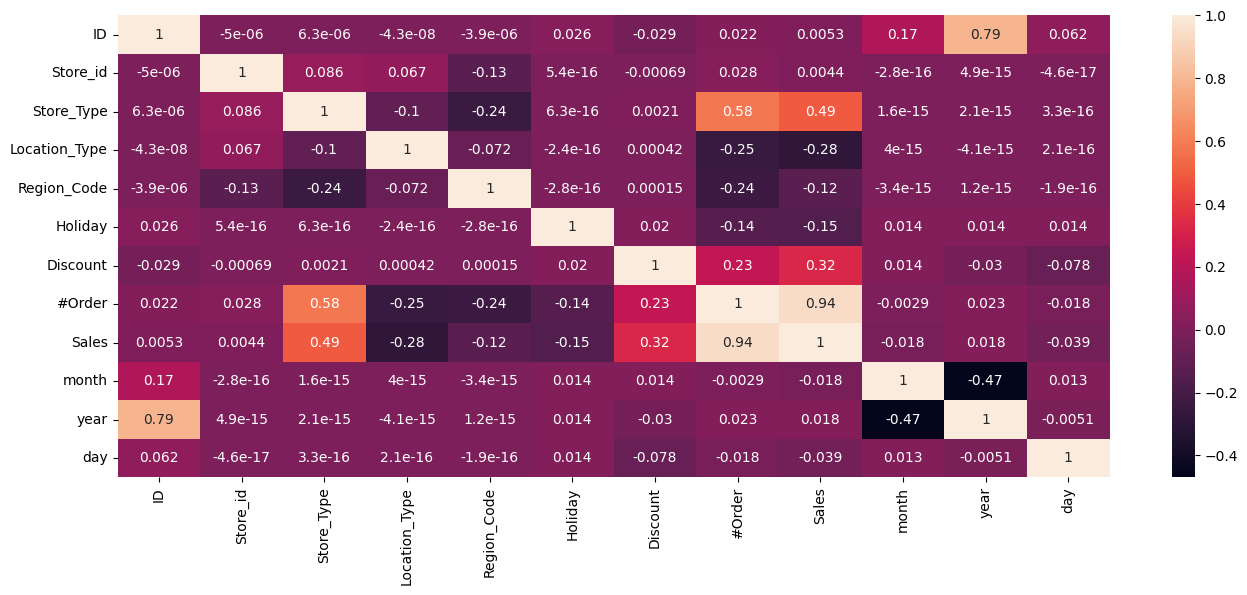

In [35]:
plt.figure(figsize=(16,6))
sns.heatmap(df_train.corr(), annot =True)
plt.show()

# **Checking Normality of Features**

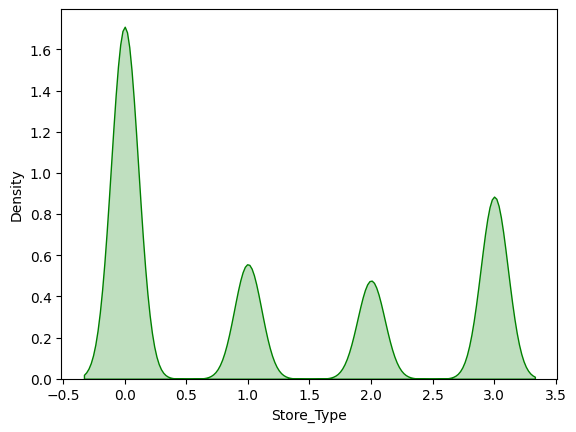

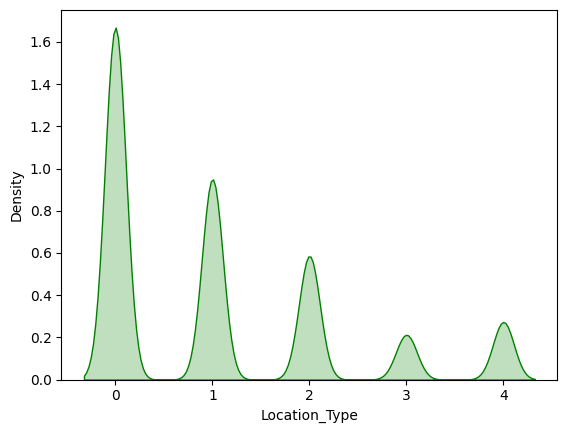

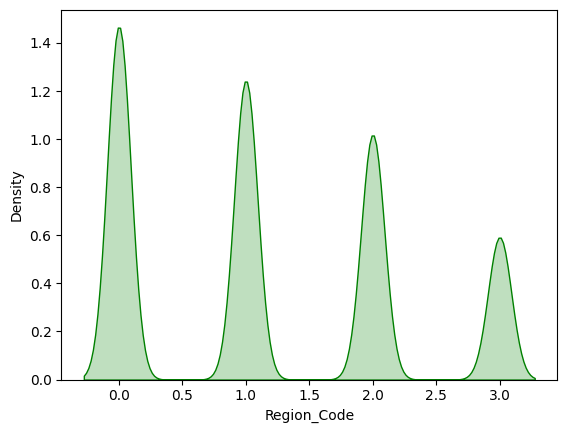

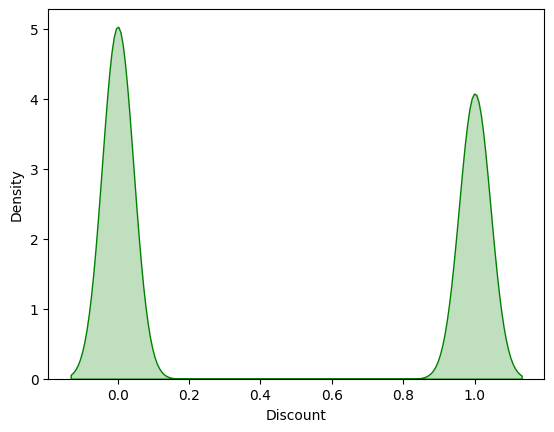

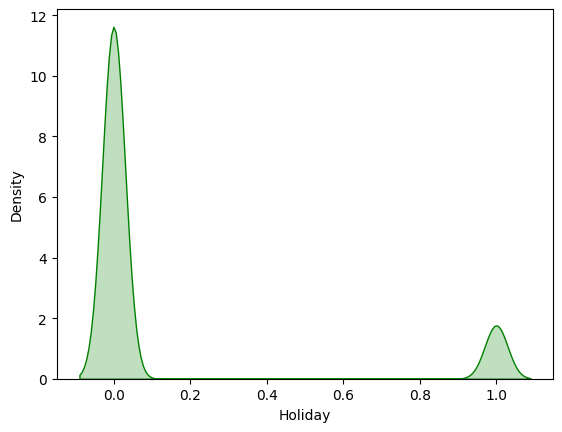

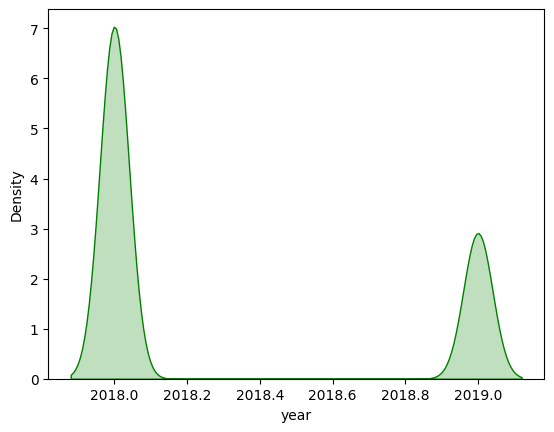

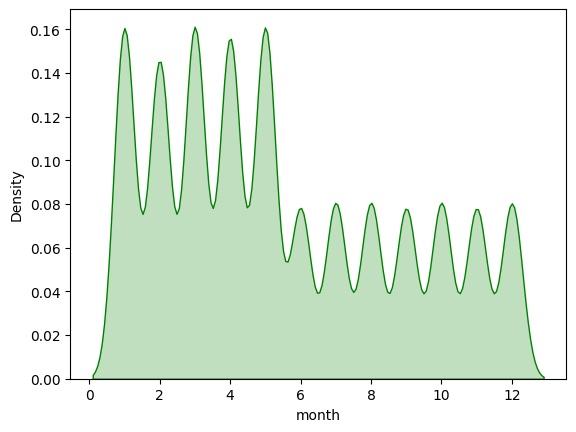

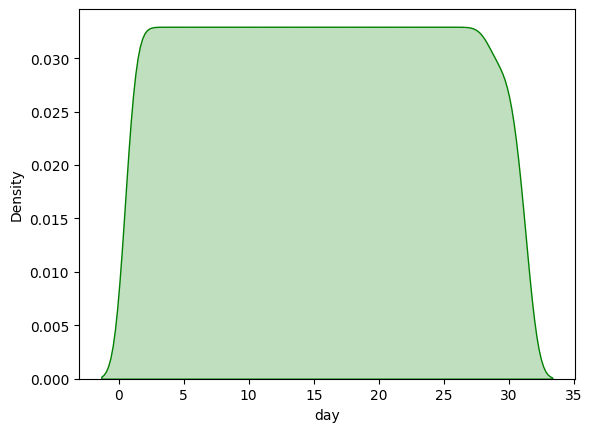

In [36]:
df_index = ['Store_Type','Location_Type','Region_Code','Discount','Holiday','year','month','day']
for i in df_index:
  sns.kdeplot(data=df_train[i],fill=True,color="g")
  plt.show()

In [37]:
df_train.to_csv('final_train.csv')

# **Hypothesis Testing**

Dependence of Sales on Discount

In [38]:
discount_yes = df_train[df_train['Discount'] == 1]['Sales']
discount_no = df_train[df_train['Discount'] == 0]['Sales']

t_stat, p_value = stats.ttest_ind(discount_yes, discount_no)
print("T-test for Discounts on Sales:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-test for Discounts on Sales:
T-statistic: 148.57853541537764
P-value: 0.0


Dependence of Sales on Holiday

In [39]:
holiday_yes = df_train[df_train['Holiday'] == 1]['Sales']
holiday_no = df_train[df_train['Holiday'] == 0]['Sales']

t_stat, p_value = stats.ttest_ind(holiday_yes, holiday_no)
print("T-test for Holidays on Sales:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-test for Holidays on Sales:
T-statistic: -67.99011744850168
P-value: 0.0


Dependence of Sales on Store Type

In [40]:
store_sales = [df_train[df_train['Store_Type'] == store]['Sales'] for store in df_train['Store_Type'].unique()]
f_stat, p_value = stats.f_oneway(*store_sales)
print("ANOVA Test for Sales by Store Type:")
print("F-statistic:", f_stat)
print("P-value:", p_value)

ANOVA Test for Sales by Store Type:
F-statistic: 35123.64411601773
P-value: 0.0


Dependence of Sales on Region

In [41]:
anova_result = stats.f_oneway(*[df_train[df_train['Region_Code'] == region]['Sales'] for region in df_train['Region_Code'].unique()])
print("ANOVA Test for Sales by Region Type:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

ANOVA Test for Sales by Region Type:
F-statistic: 1682.425528795068
P-value: 0.0


# **Feature Importance**

In [42]:
x=df_train.drop('Sales',axis=1)
y=df_train['Sales']

In [44]:
x

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,month,year,day
0,0,1,0,2,0,1,1,9,1,2018,1
1,1,253,3,1,0,1,1,60,1,2018,1
2,2,252,2,1,0,1,1,42,1,2018,1
3,3,251,1,2,0,1,1,23,1,2018,1
4,4,250,1,2,3,1,1,62,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...
188335,188335,149,1,2,1,1,1,51,5,2019,31
188336,188336,153,3,1,0,1,0,90,5,2019,31
188337,188337,154,0,2,1,1,0,56,5,2019,31
188338,188338,155,2,0,1,1,1,70,5,2019,31


In [45]:
y

,Sales
0,7011.84
1,51789.12
2,36868.20
3,19715.16
4,45614.52
...,...
188335,37272.00
188336,54572.64
188337,31624.56
188338,49162.41


# **Ordinary Least Square**

In [46]:
model = sm.OLS(y,x)

In [47]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.956e+05
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:31:07   Log-Likelihood:            -1.8883e+06
No. Observations:              188340   AIC:                         3.777e+06
Df Residuals:                  188329   BIC:                         3.777e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ID               -0.0031      0.000    -13.073

In [48]:
result.params

,0
ID,-0.003087
Store_id,-0.775604
Store_Type,-674.519609
Location_Type,-683.325193
Region_Code,1553.970606
Holiday,-1230.601051
Discount,3766.282221
#Order,576.031595
month,-79.912189
year,1.456553


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X=df_train.drop(['Sales','ID'],axis=1)
Y=df_train['Sales']

cat_features = ['Store_Type', 'Location_Type', 'Region_Code', 'Discount', 'Holiday']
num_features = ['#Order', 'year', 'month', 'day']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150672 entries, 50438 to 121958
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store_id       150672 non-null  int64
 1   Store_Type     150672 non-null  int64
 2   Location_Type  150672 non-null  int64
 3   Region_Code    150672 non-null  int64
 4   Holiday        150672 non-null  int64
 5   Discount       150672 non-null  int64
 6   #Order         150672 non-null  int64
 7   month          150672 non-null  int32
 8   year           150672 non-null  int32
 9   day            150672 non-null  int32
dtypes: int32(3), int64(7)
memory usage: 10.9 MB


In [51]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(150672, 10) (37668, 10) (150672,) (37668,)


# **Linear Regression (LR)**

In [52]:
def train_n_evaluate_model(model):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, Y_train)
    y_pred = pipeline.predict(X_test)
    return y_pred, pipeline

lr_model = LinearRegression()
lr_pred, lr_pipeline = train_n_evaluate_model(lr_model)


# **Random Forest**

In [53]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pred, rf_pipeline = train_n_evaluate_model(rf_model)

# **XGBoost**

In [54]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_pred, xgb_pipeline = train_n_evaluate_model(xgb_model)

In [55]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Evaluation:")
    print('R_Score',r2_score(y_test, y_pred))
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}\n")

# Evaluate each model
evaluate_model(Y_test, lr_pred, "Linear Regression")
evaluate_model(Y_test, rf_pred, "Random Forest")
evaluate_model(Y_test, xgb_pred, "XGBoost")

Linear Regression Evaluation:
R_Score 0.9236247610459208
Mean Absolute Error (MAE): 3669.873703074922
Mean Squared Error (MSE): 25820527.38540397
Root Mean Squared Error (RMSE): 5081.390300439828

Random Forest Evaluation:
R_Score 0.962801501604852
Mean Absolute Error (MAE): 2466.774213287829
Mean Squared Error (MSE): 12575866.991202723
Root Mean Squared Error (RMSE): 3546.246888077975

XGBoost Evaluation:
R_Score 0.9676044363975058
Mean Absolute Error (MAE): 2275.365889350184
Mean Squared Error (MSE): 10952116.79359496
Root Mean Squared Error (RMSE): 3309.398252491676



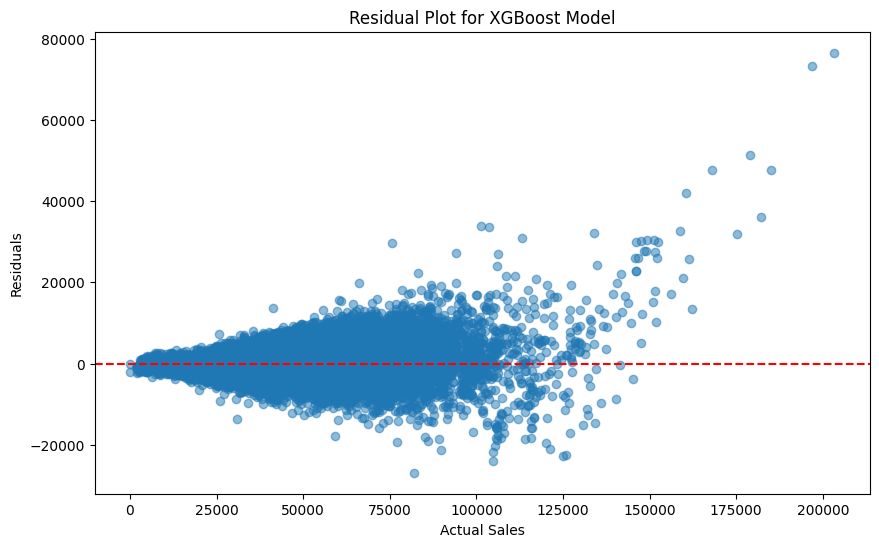

In [56]:
residuals = Y_test - xgb_pred

plt.figure(figsize=(10,6))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for XGBoost Model")
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.show()

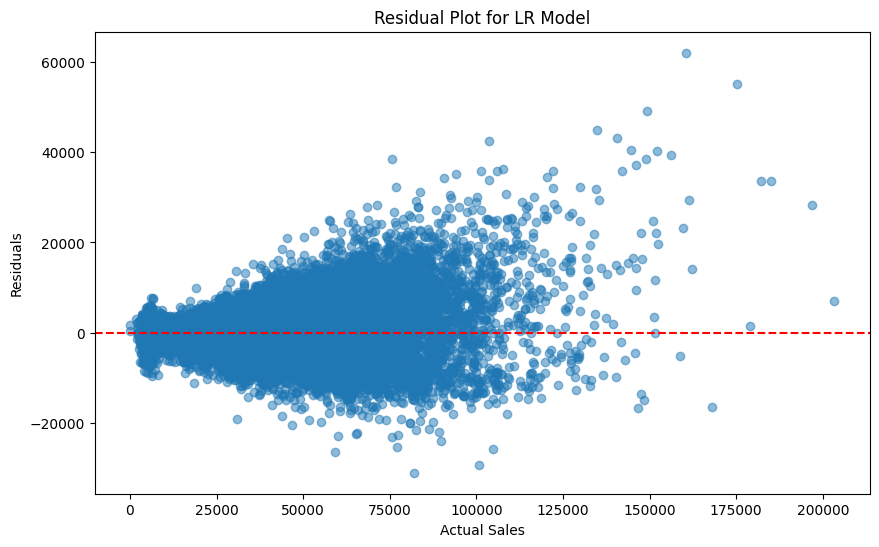

In [57]:
residuals_lr = Y_test - lr_pred

plt.figure(figsize=(10,6))
plt.scatter(Y_test, residuals_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for LR Model")
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.show()

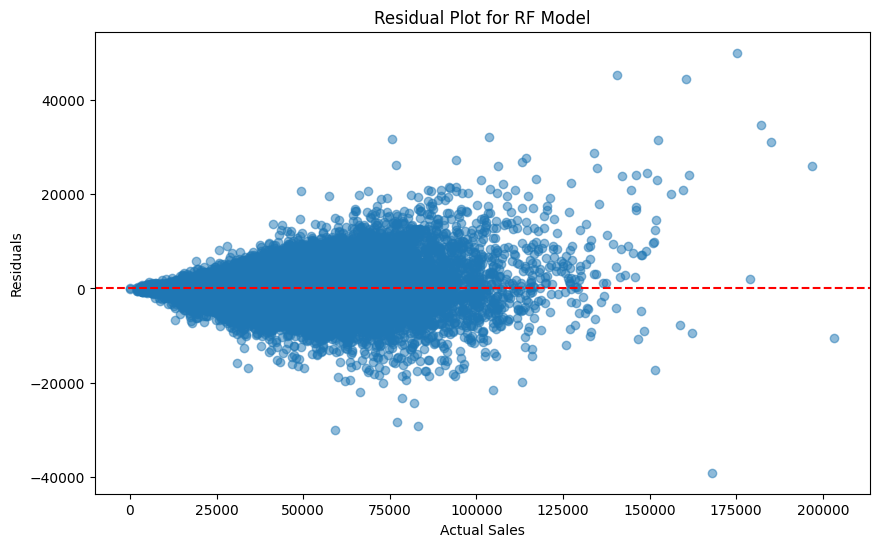

In [58]:
residuals = Y_test - rf_pred

plt.figure(figsize=(10,6))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for RF Model")
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.show()

# **Saving the Model**

In [59]:
import pickle
with open('xgb_sales_forecasting_model.pkl', 'wb') as file:
    pickle.dump(xgb_pipeline, file)